In [ ]:
%pip install brian2
%pip install brian2tools
from brian2 import *


## =========================
## TODO
### [ ] Compute steady-state values
### [ ] Add I–f curve
### [ ] Analyse threshold behaviour
### [ ] Compare integration methods
### [x] Basic HH model working

### =========================

# Hodgkin–Huxley Model Implementation in Brian2

## Model Overview

This program implements the classical Hodgkin–Huxley (HH) model of action potential generation using the Brian2 simulation framework. The HH model describes the electrical dynamics of an excitable membrane by representing it as a capacitive element with voltage-dependent ion conductances.

The membrane potential 
𝑣(𝑡)
v(t) evolves according to:
$$ Cm​dtdv​=Ileak​+INa​+IK​+Iext​ $$

where:
* 𝐶𝑚 is the membrane capacitance
* I𝑙𝑒𝑎𝑘 is the leak current
* INa is the sodium current
* IK ​is the potassium current
* Iext is the externally applied current

 ### osv osv mere info om ionic currents flere latex ligninger 


## Membrane equation:
$$ dtdv​=Cm​gL​(EL​−v)−gNa​m3h(v−ENa​)−gK​n4(v−EK​)+I​ $$

In [2]:
start_scope()
defaultclock.dt=0.01*ms


area = 40000*umetre**2
Cm      = 1*ufarad*cm**-2 * area


g_na    = 120*msiemens*cm**-2 * area
g_kd    = 36*msiemens*cm**-2 * area
gl      = 0.3*msiemens*cm**-2 * area

ENa     = 50*mV
EK      = -77*mV
El      = -54.4*mV

  # Empirical value for AP
tau_ref = 3*ms
Vth     = -20*mV


## Gating variables:
$$ dt/dm​=αm​(v)(1−m)−βm​(v)m $$
$$ dt/dn​=αn​(v)(1−n)−βn​(v)n $$
$$ dt/dh​=αh​(v)(1−h)−βh​(v)h $$


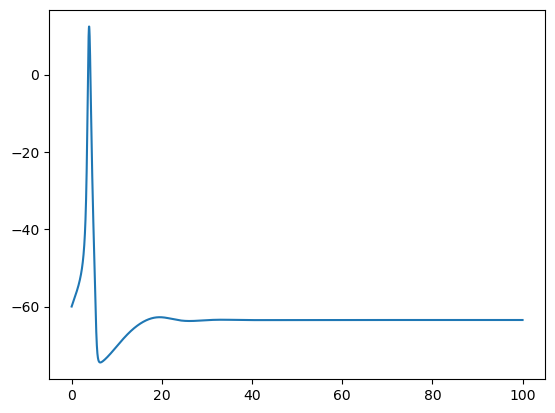

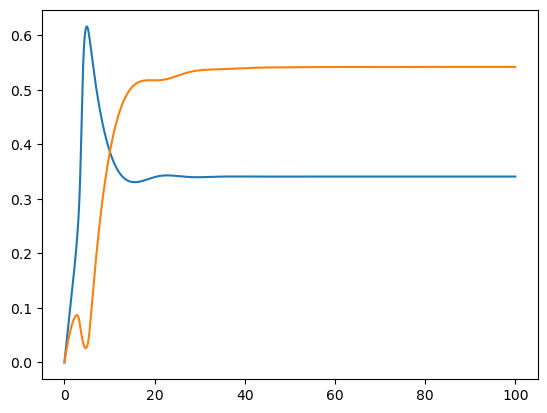

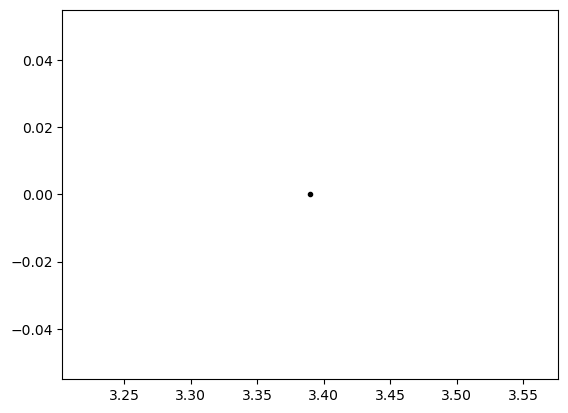

In [3]:

equation = '''
dv/dt  = (gl*(El-v)-g_na*(m*m*m)*h*(v-ENa)-g_kd*(n*n*n*n)*(v-EK)+I)/Cm : volt
dm/dt  = alpham*(1-m)-betam*m : 1
dn/dt  = alphan*(1-n)-betan*n : 1
dh/dt  = alphah*(1-h)-betah*h : 1

alpham = -0.1*(mV**-1)*(v+40*mV)/(exp(-(v+40*mV)/(10.*mV))-1.)/ms : Hz
betam  = 4*(exp(-(v+65.*mV)/(18.*mV)))/ms : Hz
alphah = 0.07*exp(-(v+65.*mV)/(20.*mV))/ms : Hz
betah  = 1./(1+exp(-(v+35.*mV)/(10.*mV)))/ms : Hz
alphan = -0.01*(mV**-1)*(v+55*mV)/(exp(-(v+55.*mV)/(10.*mV))-1.)/ms : Hz
betan=  0.125*(exp(-(v+65.*mV)/(80.*mV)))/ms : Hz

I      : amp
'''

#G = NeuronGroup(1, equation,  method='exponential_euler')
#G = NeuronGroup(1, equation,  method='euler')
#G = NeuronGroup(1, equation,  method='rk2')
G = NeuronGroup(1, equation, threshold='v>Vth', refractory=tau_ref,  method='rk4')

# Setting the default value here
G.v=-60*mV
# what are the SS value for n,m,h?


G.I = 2*uA*cm**-2 * area


statemon = StateMonitor(G, ['v','n','h'], record=0)
spikemon = SpikeMonitor(G, 'v')


run(100*ms)
figure()
plot(statemon.t/ms, statemon.v[0]/mV)


figure()
plot(statemon.t/ms, statemon.n[0])
plot(statemon.t/ms, statemon.h[0])
#plot(statemon.t/ms, statemon.h[0]+statemon.n[0])

figure()
plot(spikemon.t/ms, spikemon.i[:],'.k')